### Part 1: Anamaly Detection

- Aim : To Detect anomalous behaviour in server computers
- Given features : [ "Throughput(mb/sec)", "Latency(ms)"]

In [14]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.io as sci
import math as m

In [2]:
# loading the dataset 
data=sci.loadmat("ex8data1.mat")

In [4]:
# seperating the training data and cross validation data  --- > also given the anomoly and non anomoly
x_train=data["X"]
x_cv=data["Xval"]
y_cv=data["yval"]

In [5]:
# creating the dataframe with library pandas 
anomoly=pd.DataFrame()
anomoly["Throughput"]=x_train[:,0]
anomoly["Latency"]=x_train[:,1]

/home/sai/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/sai/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


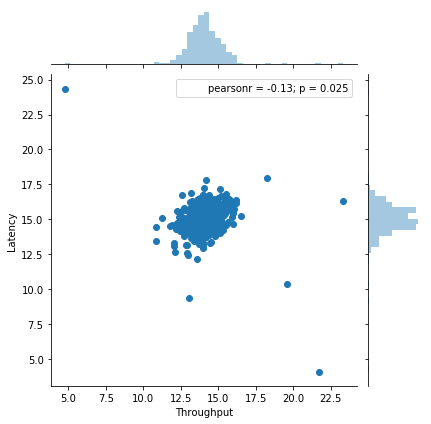

In [11]:
# displaying the information by the plotting the data
sbn.jointplot(x="Throughput",y="Latency",data=anomoly,kind="scatter")

- In the above graph there are has outliers which are behaving differently
- In middle the probalility has high but around that cluster there are some randomly spreaded data

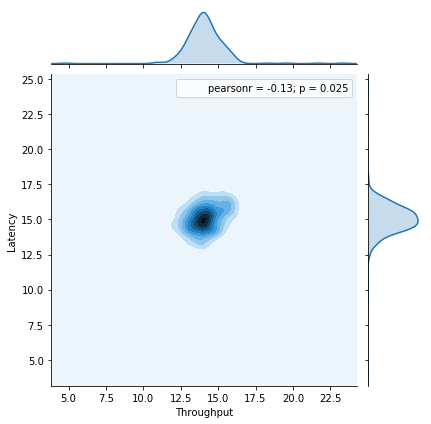

In [36]:
sbn.jointplot(x="Throughput",y="Latency",data=anomoly,kind="kde")

#### Gaussian distribution
- Gaussian distribution is also called as normal distribution

In [24]:
def Gaussian_distribution(feature,para):
    mean,vari=para
    p=(1/m.sqrt(2*m.pi*vari))*np.exp(-((feature-mean)**2)/2*vari)
    return p

In [25]:
def Anomoly(features):
    num_feat=features.shape[1]
    para=[]
    for i in range(num_feat):
        mean=features[:,i].mean()
        std=features[:,i].std()
        var=std*std
        para.append([mean,var])
    p=1
    for j in range(num_feat):
        a=Gaussian_distribution(features[:,i],para[i])
        p=p*a
    return p,para

        
        

In [26]:
p,para=Anomoly(x_train)

In [42]:
s_p=np.sort(p)

In [33]:
x_train.shape

(307, 2)

In [ ]:
def Anomoly(features):
    num_feat=features.shape[1]
    para=[]
    for i in range(num_feat):
        mean=features[:,i].mean()
        std=features[:,i].std()
        var=std*std
        para.append([mean,var])
    p=1
    for j in range(num_feat):
        a=Gaussian_distribution(features[:,i],para[i])
        p=p*a
    return p,para
